# Challenge Técnico (Core)

In [54]:
# 📦 Librerías estándar
import os

# 📊 Visualización
import matplotlib.pyplot as plt
import seaborn as sns


# 🧪 Scikit-learn
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (accuracy_score,
    auc,
    classification_report,
    ConfusionMatrixDisplay,
    confusion_matrix,
    f1_score,
    mean_squared_error,
    precision_score,
    recall_score,
    roc_curve,
    RocCurveDisplay,
    r2_score,
)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import label_binarize, OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

#modelos optuna
from xgboost import XGBClassifier
import optuna
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score


# 💾 Guardado de modelos
import joblib



# 📐 Numpy y Pandas
import numpy as np
import pandas as pd

In [55]:
path = r'C:\Users\gvald\Desktop\challen\train.csv'
df_train = pd.read_csv(path)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [56]:
df = df_train

In [57]:
# Limpieza de espacios
df.columns = df.columns.str.lower().str.strip().str.replace(" ", "_")

In [58]:
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
passengerid,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [60]:
df.isna().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [61]:
df.duplicated().sum()

np.int64(0)

In [62]:
df["age"].value_counts()

age
24.00    30
22.00    27
18.00    26
28.00    25
30.00    25
         ..
24.50     1
0.67      1
0.42      1
34.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [63]:
moda = df["age"].mode()[0]
df["age"] = df["age"].fillna(moda)

In [64]:
df["cabin"].value_counts()

cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

In [65]:
moda = df["cabin"].mode()[0]
df["cabin"] = df["cabin"].fillna(moda)

In [66]:
df["ticket"].value_counts()

ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
STON/O2. 3101282    1
Name: count, Length: 681, dtype: int64

In [67]:
moda = df["ticket"].mode()[0]
df["ticket"] = df["ticket"].fillna(moda)

In [68]:
moda = df["embarked"].mode()[0]
df["embarked"] = df["embarked"].fillna(moda)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          891 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        891 non-null    object 
 11  embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


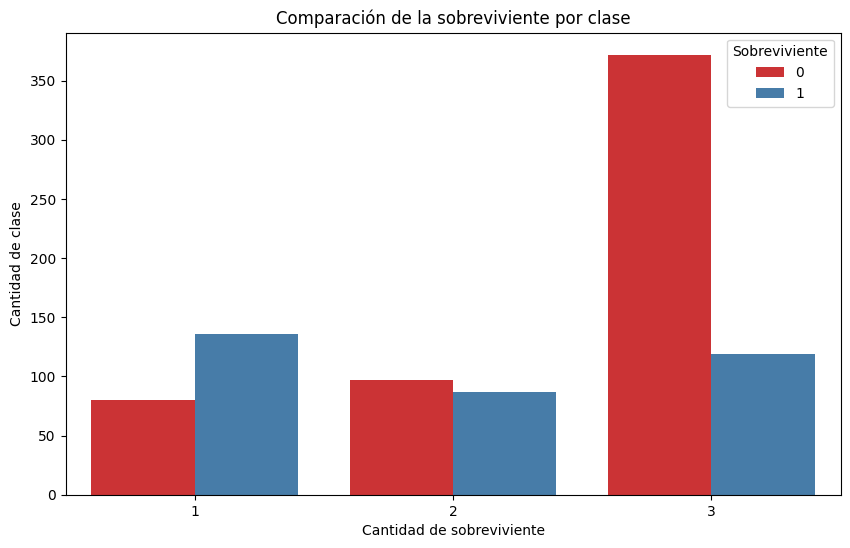

In [70]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='pclass', hue='survived', palette='Set1')

plt.title('Comparación de la sobreviviente por clase')
plt.xlabel('Cantidad de sobreviviente')
plt.ylabel('Cantidad de clase')
plt.legend(title='Sobreviviente')
plt.show()

# Preprocesador

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          891 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        891 non-null    object 
 11  embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [72]:
X = df.drop(columns=['survived'])
y = df['survived']

In [73]:
df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [74]:
# Separar variables.
num_cols = ['passengerid','pclass', 'age', 'sibsp',
       'parch', 'fare']
cat_cols = ['sex', 'embarked']

In [75]:
# Split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LogisticRegression

In [76]:
preprocessor_LogisticRegression = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(), cat_cols)
])

LogisticRegression_pipeline = Pipeline([
    ("pp", preprocessor_LogisticRegression),
    ("modelo", LogisticRegression())
])

In [77]:
# Entrenar.
LogisticRegression_pipeline.fit(X_train, y_train)

# Prediccion.
y_pred_line_Regresion = LogisticRegression_pipeline.predict(X_test)

# RandomForestClassifier

In [78]:
preprocessor_Random = ColumnTransformer(transformers=[
    ('num', "passthrough", num_cols),
    ("ord", OneHotEncoder(), cat_cols)
])
# Pipeline con RandomForest
pipeline_forest_regressor = Pipeline(steps=[
    ("preprocessing", preprocessor_Random),
    ("regressor", RandomForestClassifier(class_weight='balanced' ,n_estimators=100, random_state=42))
])

In [79]:
pipeline_forest_regressor.fit(X_train, y_train)

,steps,"[('preprocessing', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('ord', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [80]:
# Prediccion.
y_pred_forest_regressor = pipeline_forest_regressor.predict(X_test)

# DecisionTreeClassifier

In [81]:
preprocessor_Tree = ColumnTransformer(transformers=[
    ('num', "passthrough", num_cols),
    ("ord", OneHotEncoder(), cat_cols)
])
# Pipeline con RandomForest
pipeline_Tree = Pipeline(steps=[
    ("preprocessing", preprocessor_Tree),
    ("regressor", DecisionTreeClassifier( class_weight='balanced' ,random_state=42))
])

In [82]:
pipeline_Tree.fit(X_train, y_train)

,steps,"[('preprocessing', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('ord', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [83]:
# Prediccion.
y_pred_Tree= pipeline_Tree.predict(X_test)

#  KNeighborsClassifier

In [84]:
# ColumnTransformer
preprocessor_knn = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("ord", OneHotEncoder(), cat_cols)
])
knn_pipeline = Pipeline([
    ("pp", preprocessor_knn),
    ("modelo", KNeighborsClassifier())
])

In [85]:
knn_params = {
    "modelo__n_neighbors": [5,10,20,40,100]
}

knn_grid = GridSearchCV(knn_pipeline, knn_params, cv=5, scoring='accuracy', n_jobs=-1)
knn_grid.fit(X_train, y_train)

,estimator,Pipeline(step...lassifier())])
,param_grid,"{'modelo__n_neighbors': [5, 10, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('ord', ...)]"


In [86]:
# Evaluación.
knn_best = knn_grid.best_estimator_
y_pred_knn = knn_best.predict(X_test)

In [87]:
print("KNN Regressor")
print("Mejores parámetros:", knn_grid.best_params_)

KNN Regressor
Mejores parámetros: {'modelo__n_neighbors': 20}


In [88]:
# Modelo.
pipeline_knn = Pipeline([
    ("preprocessing", preprocessor_knn),
    ("model", KNeighborsClassifier(n_neighbors=40))
])

In [89]:
# Entrenamiento.
pipeline_knn.fit(X_train, y_train)

,steps,"[('preprocessing', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('ord', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [90]:
# Prediccion.
y_pred_knn = pipeline_knn.predict(X_test)

# Resultados los 4 modelosde Classifier y métricas

1. Accuracy knn con GridSearchCV = 0.81
2. Accuracy logisc = 0.76
3. Accuracy tree = 0.82
4. Accuracy forest = 0.82


KNN Classifier
Mejores parámetros: {'modelo__n_neighbors': 20}
Accuracy: 0.8100558659217877

Reporte clasificación:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.82      0.69      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



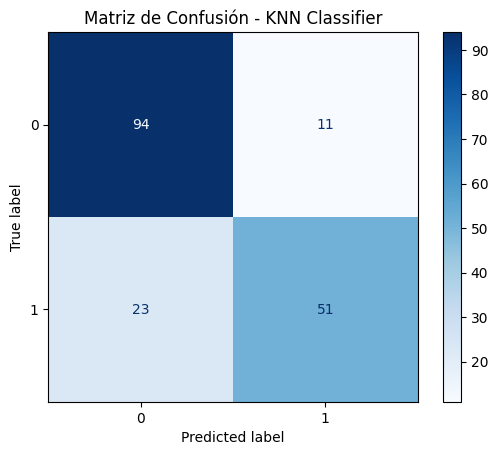

Logistic Regression
Accuracy: 0.7653631284916201

Reporte clasificación:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80       105
           1       0.71      0.73      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



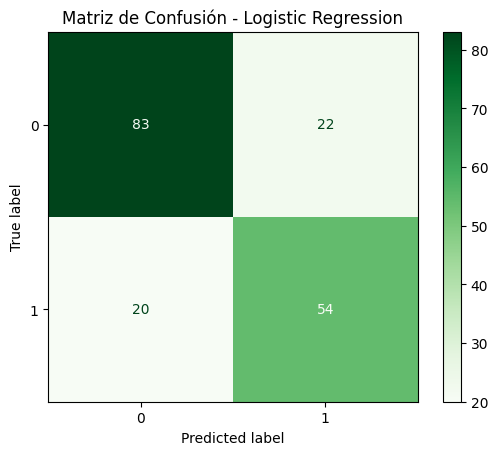

Decision Tree
Accuracy: 0.8268156424581006

Reporte clasificación:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



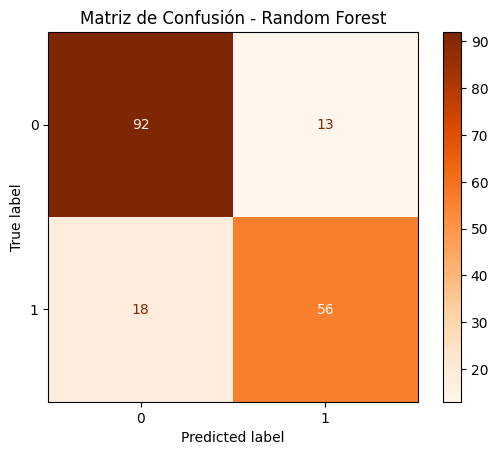

Random Forest
Accuracy: 0.8268156424581006

Reporte clasificación:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



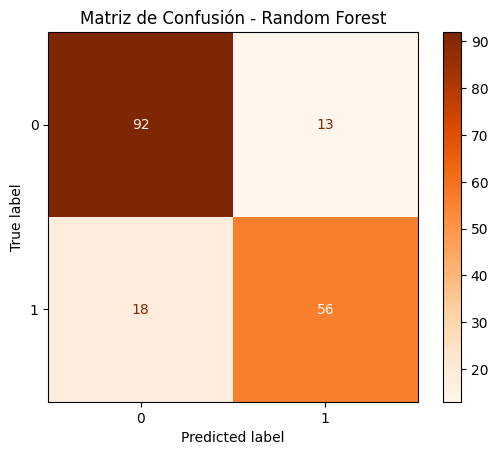

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

classes = [0,1]

print("KNN Classifier")
print("Mejores parámetros:", knn_grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nReporte clasificación:\n", classification_report(y_test, y_pred_knn))

cm_knn = confusion_matrix(y_test, y_pred_knn, labels=classes)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=classes)
disp_knn.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - KNN Classifier")
plt.show()

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_Tree))
print("\nReporte clasificación:\n", classification_report(y_test, y_pred_Tree))

cm_log = confusion_matrix(y_test, y_pred_Tree, labels=classes)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=classes)
disp_log.plot(cmap=plt.cm.Greens)
plt.title("Matriz de Confusión - Logistic Regression")
plt.show()


print("Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_forest_regressor))
print("\nReporte clasificación:\n", classification_report(y_test, y_pred_forest_regressor))

cm_rf = confusion_matrix(y_test, y_pred_forest_regressor, labels=classes)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=classes)
disp_rf.plot(cmap=plt.cm.Oranges)
plt.title("Matriz de Confusión - Random Forest")
plt.show()



print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_forest_regressor))
print("\nReporte clasificación:\n", classification_report(y_test, y_pred_forest_regressor))

cm_rf = confusion_matrix(y_test, y_pred_forest_regressor, labels=classes)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=classes)
disp_rf.plot(cmap=plt.cm.Oranges)
plt.title("Matriz de Confusión - Random Forest")
plt.show()


# Modelo XGBOOST para clasificacion

* Se pudo llegar a un Accuracy de 0.81

In [103]:
# Preprocesamiento.
preprocessor_xgboost = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("ord", OneHotEncoder(), cat_cols)
])

In [104]:
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 25),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),  # Mejora rendimiento
    }

    pipeline = Pipeline([
        ("pp", preprocessor_xgboost),
        ("model", XGBClassifier(
            random_state=42,
            eval_metric="logloss",
            **params
        ))
    ])

    score = cross_val_score(pipeline, X_train, y_train, cv=3, scoring="accuracy", n_jobs=-1)
    return score.mean()

In [105]:
# Optuna.
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)


best_params = study.best_params
print("Mejores hiperparámetros (clasificación):", best_params)

[I 2025-07-17 15:57:59,988] A new study created in memory with name: no-name-58bb534f-1955-4979-bd07-43668da8a157
[I 2025-07-17 15:58:00,087] Trial 0 finished with value: 0.7963337233627629 and parameters: {'n_estimators': 498, 'max_depth': 19, 'subsample': 0.9087943838437582, 'colsample_bytree': 0.7094522194840582, 'learning_rate': 0.2036806109853449}. Best is trial 0 with value: 0.7963337233627629.
[I 2025-07-17 15:58:00,123] Trial 1 finished with value: 0.7963396328995733 and parameters: {'n_estimators': 84, 'max_depth': 5, 'subsample': 0.8106249570759789, 'colsample_bytree': 0.9250550597822955, 'learning_rate': 0.1565936951351981}. Best is trial 1 with value: 0.7963396328995733.
[I 2025-07-17 15:58:00,168] Trial 2 finished with value: 0.8160183904785542 and parameters: {'n_estimators': 109, 'max_depth': 4, 'subsample': 0.869601935885119, 'colsample_bytree': 0.6931487797285272, 'learning_rate': 0.018090937431396267}. Best is trial 2 with value: 0.8160183904785542.
[I 2025-07-17 15:5

Mejores hiperparámetros (clasificación): {'n_estimators': 134, 'max_depth': 14, 'subsample': 0.6771957174399708, 'colsample_bytree': 0.636236741230788, 'learning_rate': 0.018999010793296606}


In [106]:
# Pipeline.
model = Pipeline([
  ("pp", preprocessor_xgboost),
  ("model", XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss", **best_params))
])

In [107]:
# Entrenamiento.
model.fit(X_train, y_train)

c:\Users\gvald\Desktop\challen\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:58:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,steps,"[('pp', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('ord', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [108]:
# Evaluacion.
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy en XGBClassifier: {acc:.4f}")

Accuracy en XGBClassifier: 0.8156


# SVM

In [109]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# Preprocesamiento.
preprocessor_svm = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("ord", OneHotEncoder(), cat_cols)
])

In [110]:
# Optuna.
def objective(trial):
  # Hiperparámetros más importantes para SVR con kernel RBF
  params = {
    "C": trial.suggest_loguniform("C", 1e-2, 1e2),                # Regularización
    "gamma": trial.suggest_loguniform("gamma", 1e-4, 1e0),        # Curvatura del modelo
    "kernel": "rbf"                                               # Usamos solo rbf
  }

  pipeline = Pipeline([
    ("pp", preprocessor_svm),
    ("model", SVC(**params, random_state=42))
  ])

  score = cross_val_score(pipeline, X_train, y_train, cv=3, scoring="accuracy", n_jobs=-1)
  return score.mean()

In [111]:
# Optuna.
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

best_params = study.best_params
print("Mejores hiperparámetros (clasificación):", best_params)

[I 2025-07-17 15:58:01,818] A new study created in memory with name: no-name-f671c680-9c94-4024-83a0-ec7aaab8ad85
C:\Users\gvald\AppData\Local\Temp\ipykernel_62708\3642037229.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-2, 1e2),                # Regularización
C:\Users\gvald\AppData\Local\Temp\ipykernel_62708\3642037229.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "gamma": trial.suggest_loguniform("gamma", 1e-4, 1e0),        # Curvatura del modelo
[I 2025-07-17 15:58:01,856] Trial 0 finished with value: 0.6235979623917077 and parameters: {'C': 0.01782638158726228, 'gamma': 0.012949422975232786}. Best is trial 0 with va

Mejores hiperparámetros (clasificación): {'C': 7.161695345329648, 'gamma': 0.1204082401195029}


In [112]:
# Pipeline.
model_svm = Pipeline([
  ("pp", preprocessor_svm),
  ("model", SVC(**best_params, random_state=42))
])

# Entrenamiento.
model_svm.fit(X_train, y_train)

,steps,"[('pp', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('ord', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [113]:
# Evaluar.
y_pred_svm = model_svm.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy en svm: {acc:.4f}")

Accuracy en svm: 0.8156


# Conclusion modelos de classificacion
1. Accuracy knn con GridSearchCV = 0.81
2. Accuracy logisc = 0.76
3. Accuracy tree = 0.82
4. Accuracy forest = 0.82
5. Modelo hiperparámetros XGBOOST =  0.81
5. Modelo hiperparámetros SVM =  0.81

El modelo con mejor predicción inicialmente fue random forest, alcanzando una accuracy de 0.82, lo que indica un desempeño muy alto, pero con cierto margen para mejorar.

